# **TITANIC SURVIVAL PREDICTION**

**Problem Statement:-**

• Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner project with readily available data. 

• The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

### Data Collection and Exploration

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
df = pd.read_csv(url) # loading titanic dataset

In [58]:
df.info() #basic info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [59]:
df.head(10) #showing some rows of data

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [60]:
df.describe

<bound method NDFrame.describe of      Survived  Pclass                                               Name  \
0           0       3                             Mr. Owen Harris Braund   
1           1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2           1       3                              Miss. Laina Heikkinen   
3           1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4           0       3                            Mr. William Henry Allen   
..        ...     ...                                                ...   
882         0       2                               Rev. Juozas Montvila   
883         1       1                        Miss. Margaret Edith Graham   
884         0       3                     Miss. Catherine Helen Johnston   
885         1       1                               Mr. Karl Howell Behr   
886         0       3                                 Mr. Patrick Dooley   

        Sex   Age  Siblings/Spouses Aboard  Parents/C

In [61]:
print(df['Sex'].unique())
print(df['Pclass'].unique()) #Displaying unique values in categorical columns

['male' 'female']
[3 1 2]


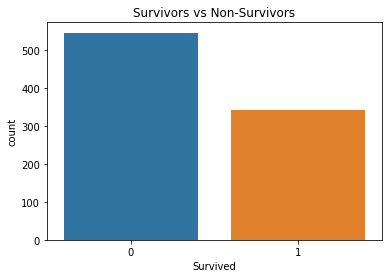

In [62]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Survived')
plt.title('Survivors vs Non-Survivors')
plt.show() #counting of survivors vs dead

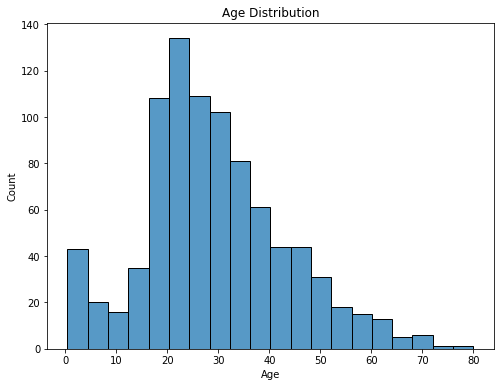

In [63]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show() #age hist

<ipython-input-64-5dbe7c39066b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr() #corr analysis


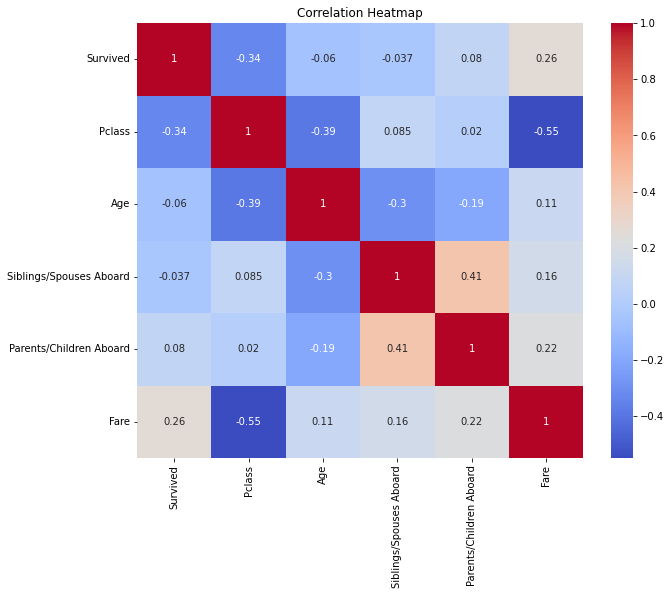

In [64]:
correlation_matrix = df.corr() #corr analysis

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show() #heatmap

### Data Splitting, Model Selection & Training

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [66]:
data = pd.get_dummies(df, columns=['Sex'], drop_first=True) #1 Hot ENcoding in Sex Column

In [67]:
features = ['Pclass', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare', 'Sex_male']
X = data[features]
y = data['Survived']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
model = LogisticRegression()  # Initializing the LR model

In [70]:
model.fit(X_train, y_train) #train using training model

LogisticRegression() In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. LogisticRegression LogisticRegression()

### Model evaluation

In [71]:
y_pred = model.predict(X_test) #pred on testing data

In [72]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)  # Calculated Accuracy
print("Accuracy:", accuracy*100)

Accuracy: 0.7528089887640449
Accuracy: 75.28089887640449


### These values helps understand how model is performing in different aspects. Overall, model has an accuracy of 75.28%, which means it's correctly predicting survival status in 75.28% of cases.

In [73]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report) # Classification Report

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.82       111
           1       0.73      0.55      0.63        67

    accuracy                           0.75       178
   macro avg       0.74      0.71      0.72       178
weighted avg       0.75      0.75      0.74       178



In [74]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix) # Confusion matric=x

Confusion Matrix:
 [[97 14]
 [30 37]]


True Positives (TP): 37

True Negatives (TN): 97

False Positives (FP): 14

False Negatives (FN): 30

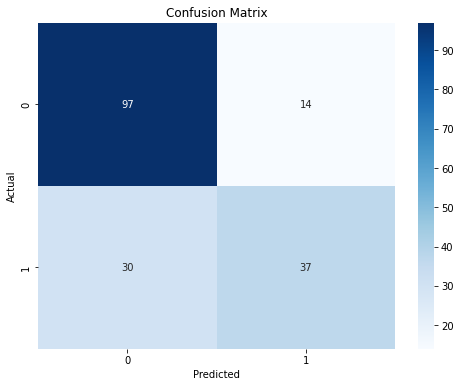

In [75]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show() #viz of Model evaluation in heatmap